# Information Visualization: Second Practical Work

### Authors: 
- David Gallardo
- Pau Amargant

## Introduction
The goal of this project is to further analyse the New York traffic accidents dataset, focusing on the use of interactive visualizations. The goal has been to create an interactive visualization with multiple views that allows users to answer the following questions:
- Which weather condition and type of vehicle were present in the majority of accidents each month? And in the combination of all the months?
- In which area and at what hour did the majority of accidents each month happen? And in the combination of all the months?
- Which area presented the majority of taxi accidents during rainy days in June on Mondays at noon, 12am?
- Which day had more accidents during clear days in July in Manhattan?
  
With this goal in mind, we have created a multiview visualization that shows the user the information required to answer the previous questions. The visualization gives the user the ability to filter and select the data in order to answer the more specific questions

In [ ]:
!pip install -r requirements.txt

We import the necessary libraries and our custom-made functions, stored in the `graphs.py` file.

In [1]:
from graphs import *


## Preprocessing
To begin with, we describe how we have preprocessed the data. Most of the process is the same as in the first practical work.
First of all, the data was preprocessed using OpenRefine, which is a tool that allows us to easily clean and transform the data. The main steps which were performed are the following:
- Normalization of vehicle types names; in this case the focus was on the three vehicle types which have been the focus of our analysis: taxis, fire trucks and ambulances. The normalization consisted in grouping the different names that were used to refer to the same vehicle type.
- Selecting the relevant columns for our analysis and setting the proper data types.
- Selecting the accidents which took place in the time interval we are interested in (jun-sep 2018)


The dataset was exported as a CSV file and further processed using Python. The main steps performed are the following:
- Date varaibles were converted to datetime objects.
- Auxiliary column were created to store the day of the week, the hour of the day, and the month of the accident.
- The coordinates of the accidents were converted to geometry format and used to obtain the borough of the accident, as in the original dataset this column contained many missing values.



In [6]:
data=get_accident_data(fname='dataset_v1.csv')

c:\Users\pamar\Desktop\Q5\VI_P2\graphs.py:57: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ny_df["x"] = buroughs.centroid.x
c:\Users\pamar\Desktop\Q5\VI_P2\graphs.py:58: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ny_df["y"] = buroughs.centroid.y
c:\Users\pamar\anaconda3\envs\VI\Lib\site-packages\IPython\core\interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Design Process
Given the interactive and multiview nature of the visualization, the design process has been iterative and has included all the views of the visualization. From the start, we have tried to keep the design as simple as possible, avoiding unnecessary elements and focusing on clearly answering the questions.
With this objective in mind, we began by sketching the overall design of the visualization, which is shown in the following image. This first sketch focused on deciding how we could use the views which had been created for the first course assignment to answer the questions. The main idea was to use the map to show the location of the accidents (as dots) and the amount per burough through a choropleth. Furthermore, a bar chart included the accidents per vehicle type. The time series would be used to show the accidents per hour and a bar chart would show the accidents per month. Finally, a lollipop chart would show the difference with respect to the mean in number of accidents per day depending on the weather condition. The view created for te first assignment is also included, to facilitate understanding the design.

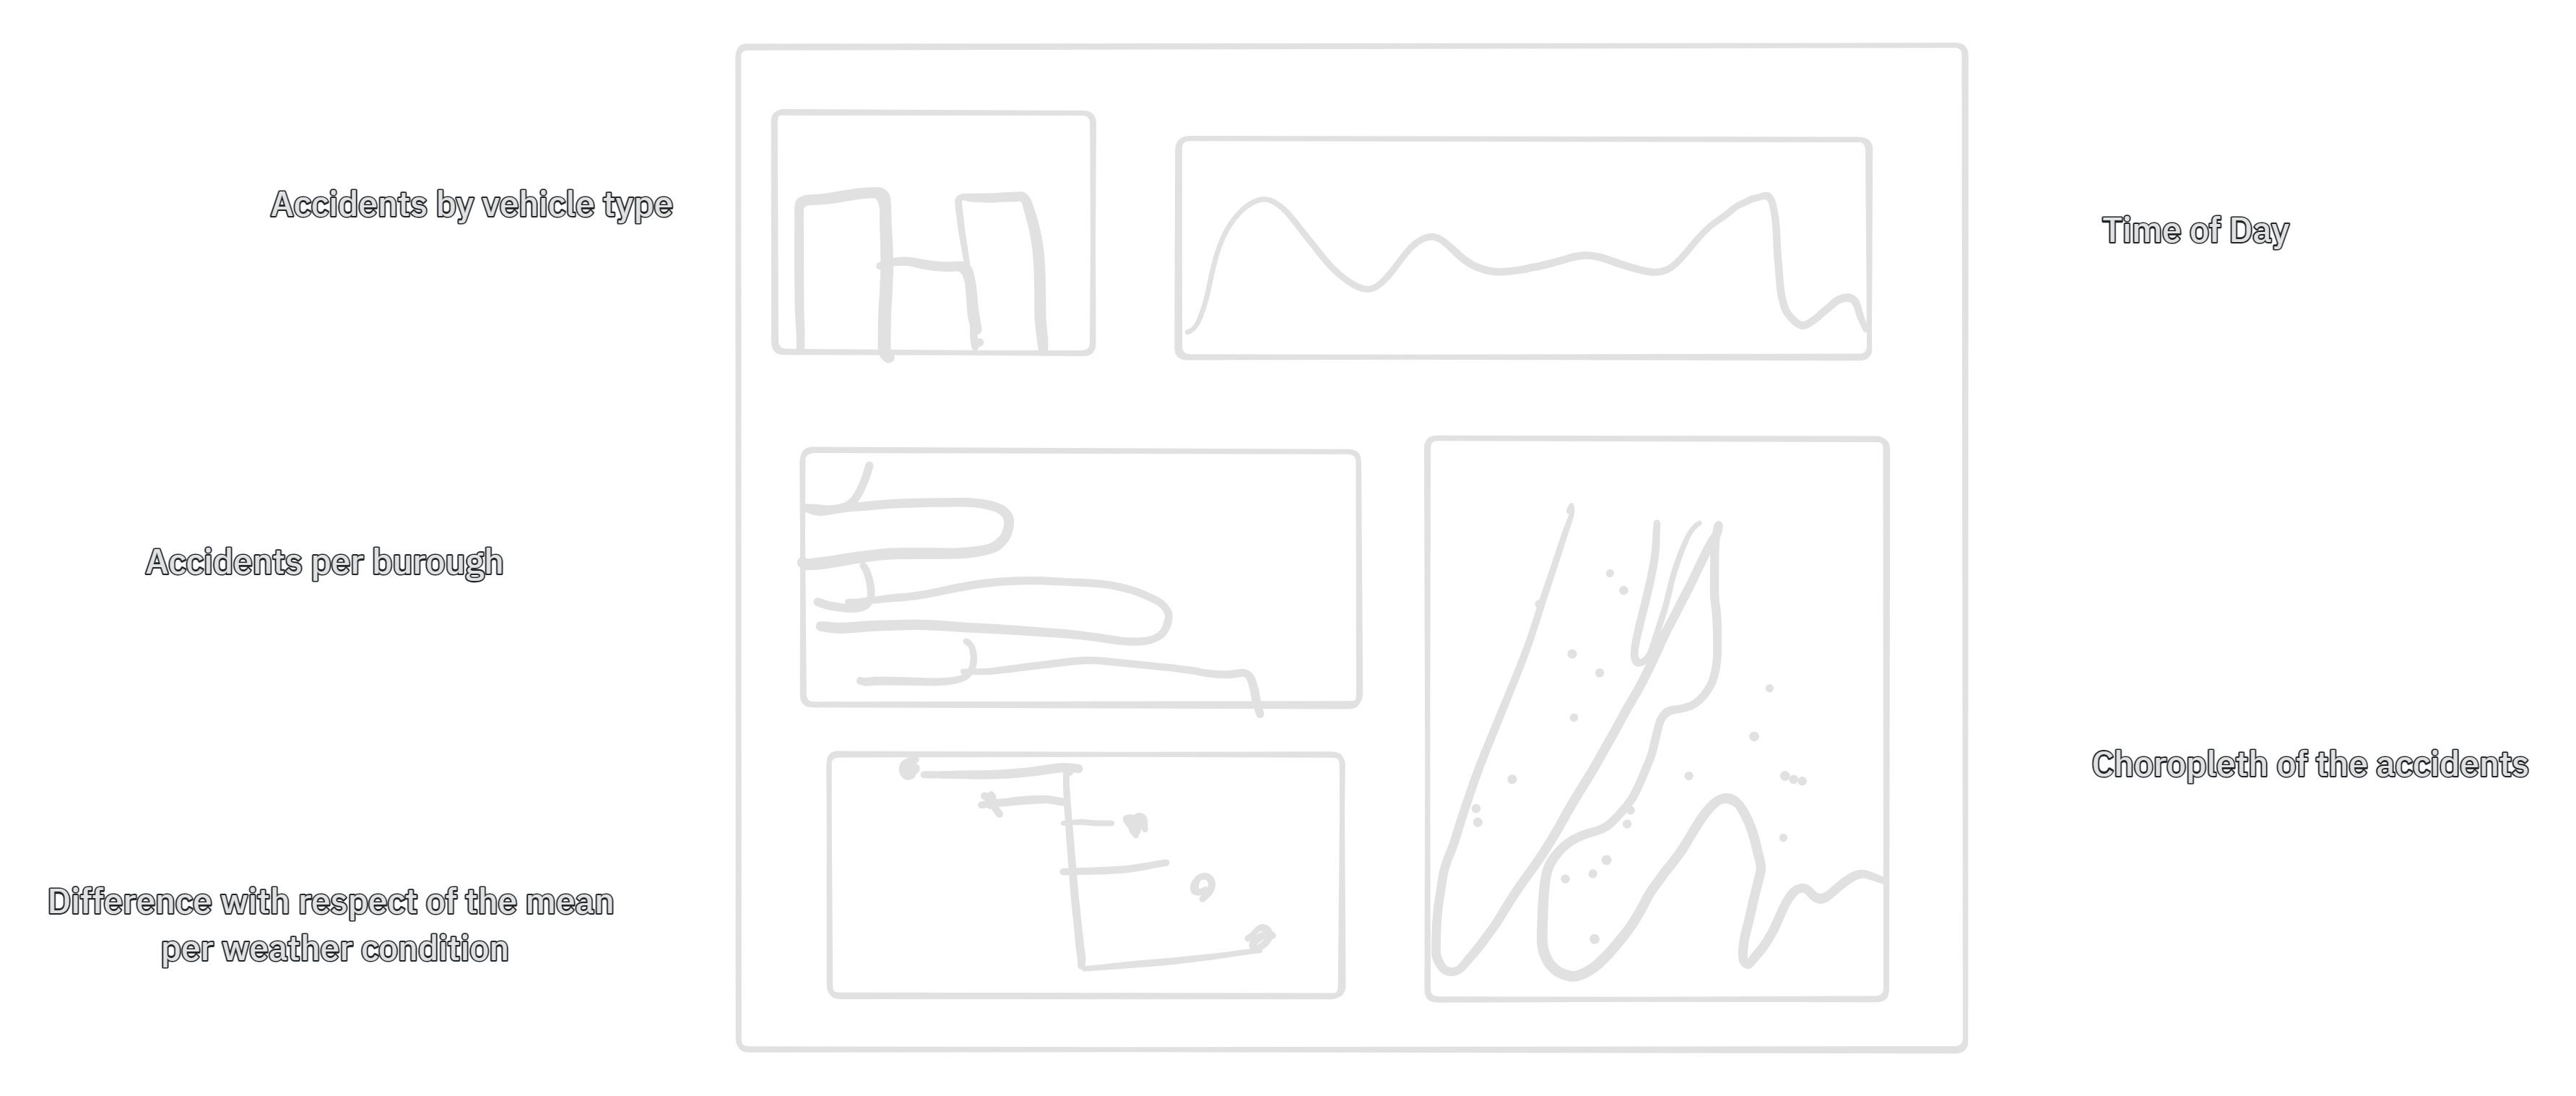
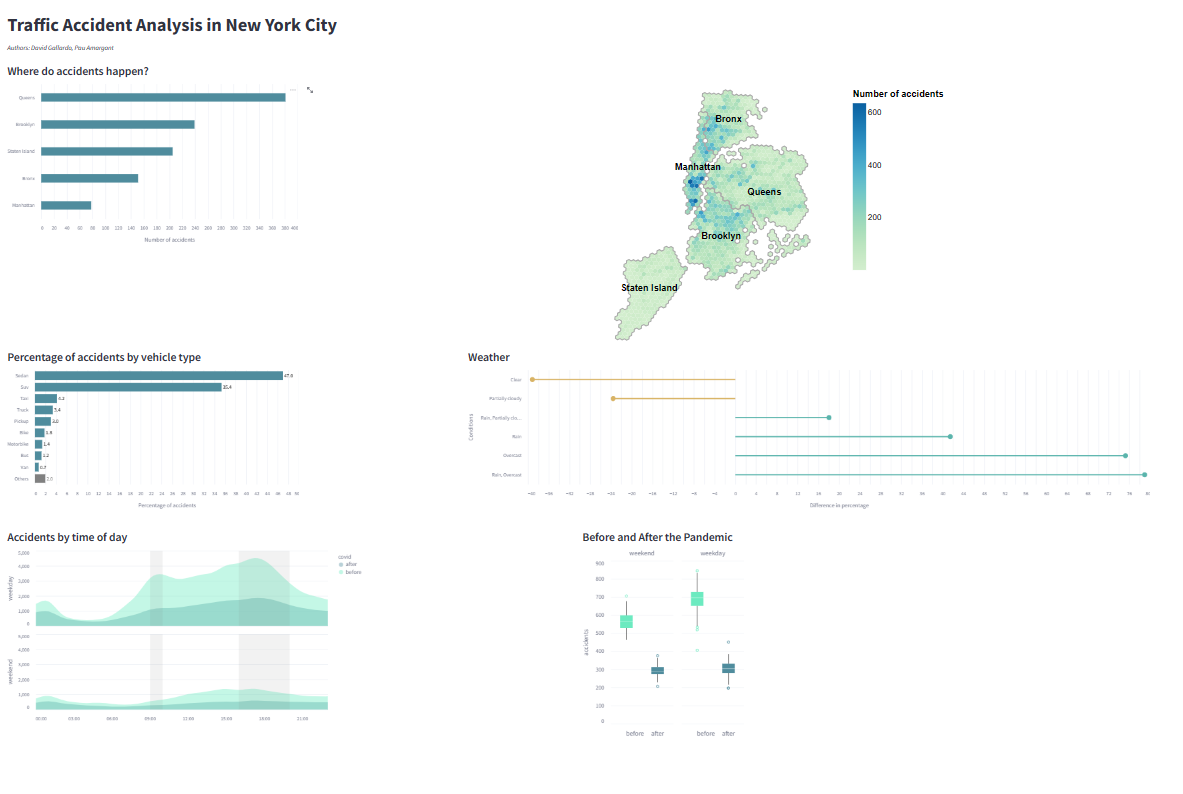


Through interactions, such as being able to select bars, points and buroughs in the map, and an interval of time, we felt that we could answer some but not all of the questions. However, we felt that before further refining the design, we should implement the basics of the visualization in order to validate wether, from a technical point of view, the design was feasible. It is worth noting that we knew that we would have to change the design, as we were not able to answer all the questions with the views we had created, especially the ones which involved selecting specific days of the week and weeks in a month. 


### First Prototypes
We began by implementing the visualizations independently from each other, having only interactions with themselves. This allowed us to more easily debug the problems and check the viability of the vis, as both altair and streamlit have known bugs and issues which limit some possibilities.

In the following sections, the design process for each view (without taking into account inter-view interactions) is described, together with the final design and analysis of the view.

#### Map 
We began by implementing the interactive map visualization. Our objectives were to create a visualization which used a choropleth to show the number of accidents per burough (using a `mark_geoshape` which encoded the count as color) and the position of each accident (using a `mark_point` encoding the coordinates) superposed on top of the choropleth. Furthermore, we wanted to be able to select a burough and a group of points, which would highlight them and update the other views so that they only showed the data corresponding to the selection.

However, we encountered several problems caused by the inner workings of altair and an issue that streamlit and altair have with geodataframes. It is a known issue ([GitHub issue #1002](https://github.com/streamlit/streamlit/issues/1002)) that when rendering an altair map chart in streamlit, a remote data source must be used and one can not use a geodataframe. This limits the ability of making an interactive choropleth due to various reasons:
- If the accident dataset is used as the data source and the geometry is looked up, streamlit gives an error due to the known bug.
- If the geometry is used as the datasource, and the accident data is looked up it does not work properly as the lookup does not perform an inner join but is a one-sided join.

Therefore, it was decided to instead use a map containing the buroughs as a base layer, without encoding the count as color, and the locations of the accidents superposed over it. Furthermore, it was decided that the following interactions would be implemented:
- When one clicks one or more buroghs, the other burough's opacity is reduced to 0.2 and only those accidents which happened in the selected buroughs are shown.
- When one selects an area of the map, the selected accidents are highlighted and the other views are updated to only show the data corresponding to the selection.

Furthermore, in order to facilitate knowing the exact number of accidents in each burough, a bar chart was added to the map view. This bar chart shows the number of accidents per burough and is updated when a selection is made. It is worth noting that we did not use an interactive tooltip over the chart as it was not possible due to technical limitations.













In [1]:
# AQUI EL MAPA

#### Accident hour chart

#### Weather condition chart

#### Vehicle type chart

### Further refinements

#### Month chart

#### Cause of accident chart



## Interactions between views

## Final design